# Prepration

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LayerNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import glob
from dateutil.parser import parse
import nltk
nltk.download('punkt')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#id
%cd gdrive/MyDrive/Sajjad_cloned_ready
!unzip 'Sajjad cloned_id.zip'

In [ ]:
#2_channels
%cd gdrive/MyDrive/Sajjad_cloned_ready
!unzip 2_Channels.zip
%cd Données-Copie-Sept 2020_2_channel

#Body

In [ ]:
#Extract the information of an EEG file from the excel file
def is_date(string, fuzzy=False):
   
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

def Date(List):
  for i in List:
    if is_date(i):
      return i
          
def get_patient_id(Str):

  for i in nltk.tokenize.wordpunct_tokenize(Str):
    if i.isdigit():
        if len(i)==6:
          return(i)
        elif len(i)>6:
          print('The Id number is incorrect for  file name:',Str) 
          print("Please make shure that the patient's id should be a six digits number")      

               
def EEG_reader(path):
  a = pd.read_fwf(path , skiprows=2, header=None, encoding='ISO-8859-1').drop(0, axis=0)
  b = pd.read_csv(path , skiprows=2, header=None, sep='\t', encoding='ISO-8859-1').drop(0, axis=0).drop(0, axis=1)
  if a.shape[1]>1:
    return a
  if b.shape[1]>1:
    return b
  if a.shape[1] + b.shape[1]<=2:
    raise Exception('The EEG file at {} has a shape or encoding error. make sure the encoding is Utf-8'.format(path))


In [ ]:
def cols(path):
  a = list(pd.read_fwf(path , header=None).drop(0, axis=0).iloc[1].values)
  if 'EEG0' in a or 'EEG1' in a or 'EEG2' in a or 'EEG3' in a:
    for i in a:
      if i.__class__ != str:
        a.remove(i)
    if a[-1].__class__ != str:
        a.remove(a[-1])     
    return a
  else:
    b= list(pd.read_csv(path,  header=None, sep='\t').drop(0, axis=0).drop(0, axis=1).iloc[0].values)
    if 'EEG0' in b or 'EEG1' in b or 'EEG2' in b or 'EEG3' in b:
      for i in b:
        if i.__class__ != str:
          b.remove(i)
      if b[-1].__class__ != str:
        b.remove(b[-1])      
      return b 
    else:
      raise ValueError('File in path: {} column is corrupted'.format(path)) 
# Writes the informention from excel file along with the EEG raw data into a dataframe.
# itretates over the whole EEG folders
n =30 # Number of EEG data folders
EEGs= []  # Will be the EEG stack
# cols = ['EEG1', 'EEG1', 'EEG2', 'EEG4', 'Site', 'Phase', 'Durée clinique ', 'Durée EEG', 'Qualité clinique',
#  'Adranergie', 'Qualité Aplatissement', 'Patho', 'Age', 'Sexe', 'Charge', 'Ti vs Tt', 'Anesthésiant', 'Qualité EEG']
# cols1 = ['EEG1', 'EEG1', 'Site', 'Phase', 'Durée clinique ', 'Durée EEG', 'Qualité clinique',
#  'Adranergie', 'Qualité Aplatissement', 'Patho', 'Age', 'Sexe', 'Charge', 'Ti vs Tt', 'Anesthésiant', 'Qualité EEG'] 

path_txt = glob.iglob('/content/gdrive/My Drive/Sajjad_cloned_ready/**/*.txt', recursive=True)
path_xls = glob.iglob('/content/gdrive/My Drive/Sajjad_cloned_ready/**/*.xlsx', recursive=True)
Path_xls = []
Path_txt = []
Txt = []
Xls = []
for i in path_txt:
  Path_txt.append(i)
for i in path_xls:
  Path_xls.append(i) 
for i in tqdm(Path_txt):
  Txt.append(EEG_reader(i))
for i in tqdm(Path_xls):
  Xls.append((i,pd.read_excel(i)))
  

duplicate = []
duplicate_names = None
for  i in range(len(Path_xls)):
  duplicate.append(Path_xls[i].split('/')[-1])
if len(duplicate)>=2:
  duplicate_names = True
else:
  duplicate_names = False

"___________________________________________________________________________________________"  
"___________________________________________________________________________________________"  
if duplicate_names == False:
  EEGs=[]
  c0=0
  c1=0
  for j in tqdm(Path_txt):
    for i in Xls: 
      try:
        Site = i[1] [i[1]['Date']==Date(j.split(',')).strip()]
      except:
        pass  
      if len(Site)>=1:
        EEG = Txt[Path_txt.index(j)]
        Site1 = Site.values
        try:
          for k in Site1:
            EEGs.append(pd.DataFrame(np.hstack([EEG.values, 
                                                np.vstack([k for i in range(EEG.shape[0])])]),columns=[*cols(j), *list(Site.columns)]))
            
        except:
          c1=Site 

"___________________________________________________________________________________________"  
"___________________________________________________________________________________________"   
if duplicate_names == True:
  print ("The Excel files' name  have duplicates")
  print(duplicate)

100%|██████████| 45/45 [00:01<00:00, 27.41it/s]

The Excel files' name  have duplicates
['135866.xlsx', '170894.xlsx', '191007.xlsx', '201575.xlsx', '203961.xlsx', '218132.xlsx', '218957.xlsx', '227193.xlsx', '234300.xlsx', '245446.xlsx', '258322.xlsx', '296707.xlsx', '325733.xlsx', '334217.xlsx', '348655.xlsx', '353456.xlsx', '354886.xlsx', '369690.xlsx', '377765.xlsx', '388304.xlsx', '465293.xlsx', '465293.xlsx', '494811.xlsx', '514538.xlsx', '525847.xlsx', '537723.xlsx', '640178.xlsx', '674119.xlsx', '685561.xlsx', '325733.xlsx', '354886.xlsx', '218132.xlsx', '369690.xlsx', '348655.xlsx', '234300.xlsx', '685561.xlsx', '465293.xlsx', '377765.xlsx', '526847.xlsx', '494811.xlsx', '465293.xlsx', '537723.xlsx', '191007.xlsx', '203961.xlsx', '353456.xlsx']


In [ ]:
EEGs_Quad_Channel=[]
EEGs_Dual_Channel=[]
Outlyers=[]
c0=0
c1=0
for j in tqdm(Path_txt):
  for i in Xls: 
    try:
      Site = i[1][i[1]['Date']==Date(j.split(',')).strip()]
    except:
      Site  
    if get_patient_id(j)==get_patient_id(i[0]):
      EEG = Txt[Path_txt.index(j)]
      Site1 = Site.values
      for k in Site1:
        mat = pd.DataFrame(np.hstack([EEG.values, np.vstack([k for i in range(EEG.shape[0])])]),columns=[*['EEG{}'.format(i) for i in range(EEG.shape[1])], *list(Site.columns)]).dropna(axis = 1, how = 'all')
        mat['Patient_id'] = get_patient_id(i[0])
        mat['Xls_file_path'] = i[0] 
        mat['EEG_file_path'] = j
        try:                                    
          Sexe = i[1]['Sexe'].iloc[0]
          Age = i[1]['Age'].iloc[0]
          Patho = i[1]['Patho'].iloc[0]
          mat['Sexe'].iloc[0] = Sexe
          mat['Age'].iloc[0] = Age
          mat['Patho'].iloc[0] = Patho
          
        except:
          pass 
          
        if 'EEG1'in list(mat.columns) and 'EEG2'in list(mat.columns) and 'EEG3'  in list(mat.columns):
          EEGs_Quad_Channel.append(mat)
        if 'EEG0' in list(mat.columns) and 'EEG1' in list(mat.columns) and 'EEG2' not in list(mat.columns):
          EEGs_Dual_Channel.append(mat)
        if 'EEG1' in list(mat.columns) and 'EEG2' in list(mat.columns) and 'EEG3' not in list(mat.columns):
          EEGs_Dual_Channel.append(mat)
        if 'EEG0'not in list(mat.columns) and 'EEG1'not in list(mat.columns) and 'EEG2' not in list(mat.columns):
          Outlyers.append(mat) 
        if 'ECG'in list(mat.columns):
          Outlyers.append(mat)    

         
        
     

 24%|██▍       | 100/420 [00:15<00:59,  5.37it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 35%|███▍      | 146/420 [00:22<00:37,  7.26it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [ ]:
EEGs_Quad_Channel[0]

,EEG0,EEG1,EEG2,EEG3,Date,Ti vs Tt,Site,Phase,% Charge,Durée clinique,Durée EEG,Anesthésiant,Qualité clinique,Qualité EEG,Adranergie,Qualité Aplatissement,Patient_id,Xls_file_path,EEG_file_path
0,13.3,18.6,-0.1,10.4,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
1,14.9,21.5,2.4,12.8,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
2,15.0,22.8,4.3,14.4,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
3,13.5,22.4,5.1,14.9,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
4,10.5,20.6,4.4,14.5,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40841,-30.1,-17.6,-9.0,10.3,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40842,-29.3,-17.5,-8.8,10.1,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40843,-28.3,-17.1,-8.4,9.3,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40844,-27.1,-16.4,-7.8,7.8,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...


In [ ]:
# i =25
# s= EEGs_Quad_Channel[i]['EEG1'].astype(float)[EEGs_Quad_Channel[i]['EEG1'].astype(float) ==EEGs_Quad_Channel[i]['EEG1'].astype(float).max()].index[0]
# t= EEGs_Quad_Channel[i]['EEG1'].astype(float)[EEGs_Quad_Channel[i]['EEG1'].astype(float) ==EEGs_Quad_Channel[i]['EEG1'].astype(float).min()].index[0]

# if s-300>0 and s+300<EEGs_Quad_Channel[i].shape[0] :
#   print(s, t)
#   EEGs_Quad_Channel[i]['EEG1'].astype(float)[s-300:s+300].plot(figsize=(15,10))
# else: 
#   print(s, t,EEGs_Quad_Channel[i]['EEG_file_path'][0])

In [ ]:
# Preshock and postshock seperation and concatenation

cols = ['index', 'EEG0', 'EEG1', 'EEG2', 'EEG3','Post_EEG0', 'Post_EEG1', 'Post_EEG2', 'Post_EEG3', 'Date', 'Ti vs Tt', 'Site',
       'Phase', '% Charge', 'Durée clinique ', 'Durée EEG', 'Anesthésiant',
       'Qualité clinique', 'Qualité EEG', 'Adranergie',
       'Qualité Aplatissement', 'Patient_id', 'Xls_file_path', 'EEG_file_path']
#=============================================================================================#
Pre_shock1 = [EEGs_Quad_Channel[i].iloc[0:min(EEGs_Quad_Channel[i]['EEG2'].astype(float)[EEGs_Quad_Channel[i]['EEG2'].astype(float) ==EEGs_Quad_Channel[i]['EEG2'].astype(float).max()].index[0],
                                              EEGs_Quad_Channel[i]['EEG0'].astype(float)[EEGs_Quad_Channel[i]['EEG0'].astype(float) ==EEGs_Quad_Channel[i]['EEG0'].astype(float).max()].index[0],
                                              EEGs_Quad_Channel[i]['EEG1'].astype(float)[EEGs_Quad_Channel[i]['EEG1'].astype(float) ==EEGs_Quad_Channel[i]['EEG1'].astype(float).max()].index[0],
                                              EEGs_Quad_Channel[i]['EEG3'].astype(float)[EEGs_Quad_Channel[i]['EEG3'].astype(float) ==EEGs_Quad_Channel[i]['EEG3'].astype(float).max()].index[0])].reset_index() for i in range(403)]
Post_shock1 = [EEGs_Quad_Channel[i].iloc[-1000:-1].reset_index() for i in range(403)]
#=============================================================================================#

for i in range(403):
  Pre_shock1[i]['Post_EEG0'] = Post_shock1[i]['EEG0'] 
  Pre_shock1[i]['Post_EEG1'] = Post_shock1[i]['EEG1'] 
  Pre_shock1[i]['Post_EEG2'] = Post_shock1[i]['EEG2'] 
  Pre_shock1[i]['Post_EEG3'] = Post_shock1[i]['EEG3'] 
  Pre_shock1[i] = Pre_shock1[i].reindex(columns = cols)
  

In [ ]:
Frontal = []
Temporal = []

for i in range(len(EEGs_Quad_Channel)):
  if Pre_shock1[i]['Site'].iloc[0]=='BiF':
    Frontal.append(EEGs_Quad_Channel[i])

  if Pre_shock1[i]['Site'].iloc[0]=='BiT':
    Temporal.append(EEGs_Quad_Channel[i])

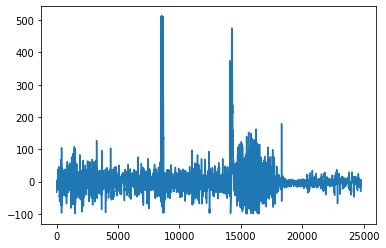

In [ ]:
Temporal[4]['EEG0'].astype(float).plot()

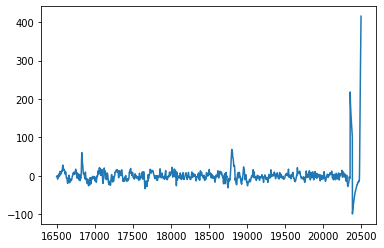

In [ ]:
Pre_shock1[1]['EEG3'].iloc[-4000:-1].astype(float).plot()

In [ ]:
Pre_post_shock = pd.concat(Pre_shock1, axis=0)

Quad channel success rate

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


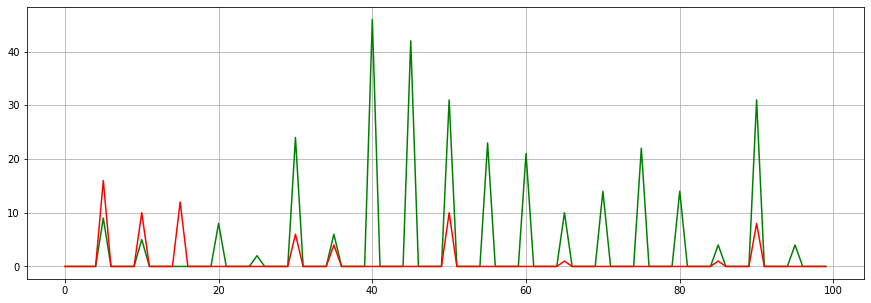

In [ ]:
G =[]
B =[]

for j in range (100):
  g = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité EEG'].iloc[0]=='+']
  g1 = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité EEG'].iloc[0]=='++']
  g2 = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité EEG'].iloc[0]=='+++']

  b = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité EEG'].iloc[0]=='-']
  G.append(len(g)+len(g1)+len(g2))
  B.append(len(b))
plt.figure(figsize=(15,5))
plt.plot(G, color ='G')
plt.plot(B, color ='R')  
plt.grid()
plt.show()

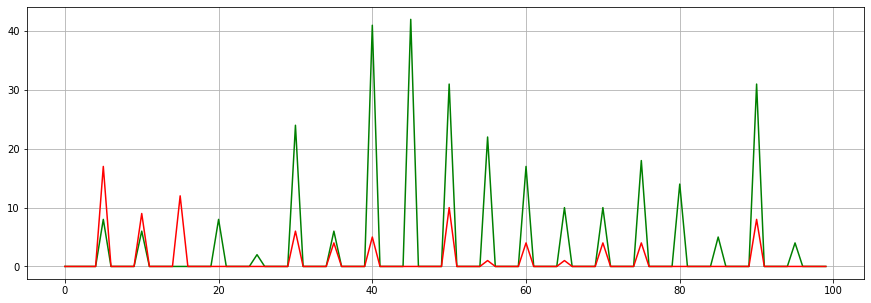

In [ ]:
G =[]
B =[]

for j in range (100):
  g = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité clinique'].iloc[0]=='+']
  g1 = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité clinique'].iloc[0]=='++']
  g2 = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité clinique'].iloc[0]=='+++']

  b = [Pre_shock1[i] for i in range(403) if Pre_shock1[i]['% Charge'].iloc[0]==j and Pre_shock1[i]['Qualité clinique'].iloc[0]=='-']
  G.append(len(g)+len(g1)+len(g2))
  B.append(len(b))
plt.figure(figsize=(15,5))
plt.plot(G, color ='G')
plt.plot(B, color ='R')  
plt.grid()
plt.show()

In [ ]:
Good_titration=[]
Bad_titration=[]

for i in Pre_shock1:
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='+++':
    Good_titration.append(i)
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='-':
    Bad_titration.append(i)  

In [ ]:
Good_titration=[]
Bad_titration=[]

for i in Pre_shock1:
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='+++':
    Good_titration.append(i)
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='-':
    Bad_titration.append(i)  

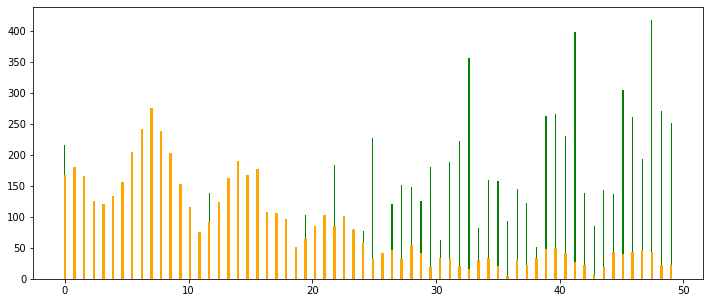

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
n=0
# Number of sample points
N = 128
# sample spacing
T = 1.0 / 100
x = np.linspace(0.0, N*T, N)
y = Good_titration[n]['EEG1'].values.astype(float)
y1 = Bad_titration[n]['EEG1'].values.astype(float)
yf = scipy.fftpack.fft(y)
y1f = scipy.fftpack.fft(y1)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(xf, 2.0/N * np.abs(yf[:N//2]),width=0.1, color ='g')
ax.bar(xf, 2.0/N * np.abs(y1f[:N//2]),width=0.2 ,color ='orange')
plt.show()

#Neural Test

In [ ]:
yf.shape

(19598,)

In [ ]:
Good_titration=[]
Bad_titration=[]

for i in Pre_shock1:
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='+++':
    Good_titration.append(i)
  if i['% Charge'].iloc[0]==30 and i['Qualité clinique'].iloc[0]=='-':
    Bad_titration.append(i)  
#========================================================================================    
FFT_Good_30=[]
FFT_Bad_30=[]
FFT_Good_30_quad=[]
FFT_Bad_30_quad=[]
for j in range(1,4):
  for i in range (len(Good_titration)):
    FFT_Good_30.append(scipy.fftpack.fft(Good_titration[i]['EEG{}'.format(j)].values.astype(float)))
  FFT_Good_30_quad.append(np.array(FFT_Good_30))
  FFT_Good_30=[]
#==============================================================================
for j in range(1,4):
  for i in range (len(Bad_titration)):
    FFT_Bad_30.append(scipy.fftpack.fft(Bad_titration[i]['EEG{}'.format(j)].values.astype(float)))
    
  FFT_Bad_30_quad.append(np.array(FFT_Bad_30))
  FFT_Bad_30=[]  
FFT_Good_30_quad=np.stack(FFT_Good_30_quad, axis=1)
FFT_Bad_30_quad=np.stack(FFT_Bad_30_quad, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


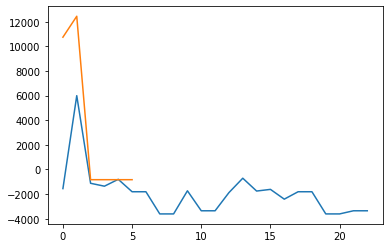

In [ ]:
plt.plot([np.mean(FFT_Good_30_quad[i][0][0:10]) for i in range(23)])
plt.plot([np.mean(FFT_Bad_30_quad[i][0][0:10]) for i in range(6)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)


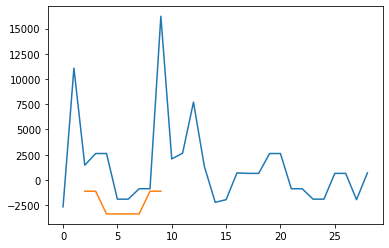

In [ ]:
Good_titration=[]
Bad_titration=[]

for i in Pre_shock1:
  if i['% Charge'].iloc[0]==50 and i['Qualité clinique'].iloc[0]=='+++':
    Good_titration.append(i)
  if i['% Charge'].iloc[0]==50 and i['Qualité clinique'].iloc[0]=='-':
    Bad_titration.append(i)  
#========================================================================================    
FFT_Good_50=[]
FFT_Bad_50=[]
FFT_Good_50_quad=[]
FFT_Bad_50_quad=[]
for j in range(1,4):
  for i in range (len(Good_titration)):
    FFT_Good_50.append(scipy.fftpack.fft(Good_titration[i]['EEG{}'.format(j)].values.astype(float)))
  FFT_Good_50_quad.append(np.array(FFT_Good_50))
  FFT_Good_50=[]
#==============================================================================
for j in range(1,4):
  for i in range (len(Bad_titration)):
    FFT_Bad_50.append(scipy.fftpack.fft(Bad_titration[i]['EEG{}'.format(j)].values.astype(float)))
    
  FFT_Bad_50_quad.append(np.array(FFT_Bad_50))
  FFT_Bad_50=[]  
FFT_Good_50_quad=np.stack(FFT_Good_50_quad, axis=1)
FFT_Bad_50_quad=np.stack(FFT_Bad_50_quad, axis=1)

#======================================================================================================

plt.plot([np.mean(FFT_Good_50_quad[i][0][20:30]) for i in range(FFT_Good_50_quad.shape[0])])

plt.plot([np.mean(FFT_Bad_50_quad[i][0][20:30]) for i in range(FFT_Bad_50_quad.shape[0])])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


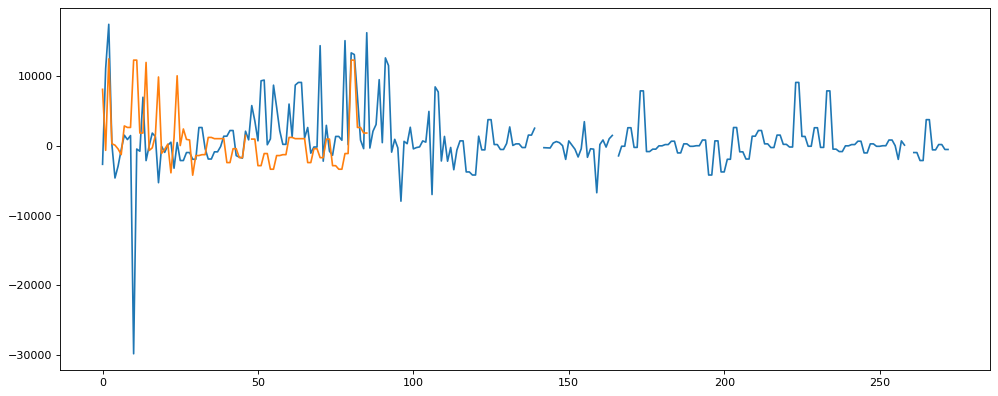

In [ ]:
Good_titration=[]
Bad_titration=[]

for i in Pre_shock1:
  if i['Qualité clinique'].iloc[0]=='+++':
    Good_titration.append(i)
  if i['Qualité clinique'].iloc[0]=='-':
    Bad_titration.append(i)  
#========================================================================================    
FFT_Good_50=[]
FFT_Bad_50=[]
FFT_Good_50_quad=[]
FFT_Bad_50_quad=[]
for j in range(1,4):
  for i in range (len(Good_titration)):
    FFT_Good_50.append(scipy.fftpack.fft(Good_titration[i]['EEG{}'.format(j)].values.astype(float)))
  FFT_Good_50_quad.append(np.array(FFT_Good_50))
  FFT_Good_50=[]
#==============================================================================
for j in range(1,4):
  for i in range (len(Bad_titration)):
    FFT_Bad_50.append(scipy.fftpack.fft(Bad_titration[i]['EEG{}'.format(j)].values.astype(float)))
    
  FFT_Bad_50_quad.append(np.array(FFT_Bad_50))
  FFT_Bad_50=[]  
FFT_Good_50_quad=np.stack(FFT_Good_50_quad, axis=1)
FFT_Bad_50_quad=np.stack(FFT_Bad_50_quad, axis=1)

#======================================================================================================
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
plt.plot([np.mean(FFT_Good_50_quad[i][0][20:30]) for i in range(FFT_Good_50_quad.shape[0])])

plt.plot([np.mean(FFT_Bad_50_quad[i][0][20:30]) for i in range(FFT_Bad_50_quad.shape[0])])


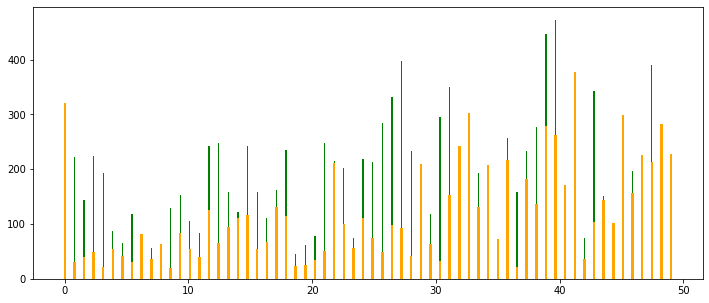

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
n=7
# Number of sample points
N = 128
# sample spacing
T = 1.0 / 100
x = np.linspace(0.0, N*T, N)
y = Good_titration[n]['EEG0'].values.astype(float)
y1 = Good_titration[0]['EEG0'].values.astype(float)
yf = scipy.fftpack.fft(y)
y1f = scipy.fftpack.fft(y1)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(xf, 2.0/N * np.abs(yf[:N//2]),width=0.1, color ='g')
ax.bar(xf, 2.0/N * np.abs(y1f[:N//2]),width=0.2 ,color ='orange')
plt.show()

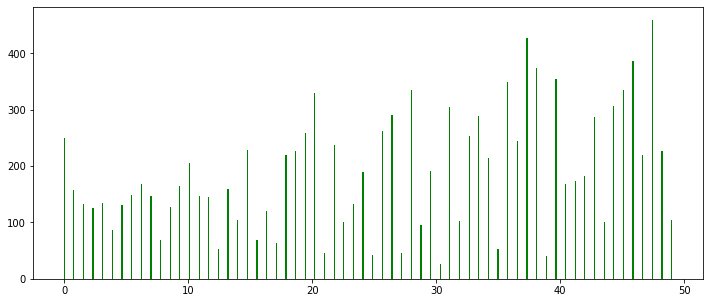

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
n=1
# Number of sample points
N = 128
# sample spacing
T = 1.0 / 100
x = np.linspace(0.0, N*T, N)
y = Good_titration[n]['EEG1'].values.astype(float)
# y1 = Good_titration[0]['EEG1'].values.astype(float)
yf = scipy.fftpack.fft(y)
# y1f = scipy.fftpack.fft(y1)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(xf, 2.0/N * np.abs(yf[:N//2]),width=0.1, color ='g')
# ax.bar(xf, 2.0/N * np.abs(y1f[:N//2]),width=0.2 ,color ='orange')
plt.show()

In [ ]:
for n in range(9):
  y = Bad_titration[n]['EEG1'].values.astype(float)
  yf = scipy.fftpack.fft(y)
  print(np.abs(yf[:N//2])[15]/64 )


164.5829897848057
90.79544747723291
186.1839610348577
186.1839610348577
186.1839610348577
186.1839610348577


IndexError: ignored

Dual channel success rate

In [ ]:
# Preshock and postshock seperation and concatenation Dual channel

cols = ['index', 'EEG0', 'EEG1','Post_EEG0', 'Post_EEG1', 'Date', 'Ti vs Tt', 'Site',
       'Phase', '% Charge', 'Durée clinique ', 'Durée EEG', 'Anesthésiant',
       'Qualité clinique', 'Qualité EEG', 'Adranergie',
       'Qualité Aplatissement', 'Patient_id', 'Xls_file_path', 'EEG_file_path']
#=============================================================================================#
Pre_shock2 = [EEGs_Dual_Channel[i].iloc[0:min(EEGs_Dual_Channel[i]['EEG0'].astype(float)[EEGs_Dual_Channel[i]['EEG0'].astype(float) ==EEGs_Dual_Channel[i]['EEG0'].astype(float).max()].index[0],
                                              EEGs_Dual_Channel[i]['EEG1'].astype(float)[EEGs_Dual_Channel[i]['EEG1'].astype(float) ==EEGs_Dual_Channel[i]['EEG1'].astype(float).max()].index[0])].reset_index() for i in range(194)]
Post_shock2 = [EEGs_Dual_Channel[i].iloc[-1000:-1].reset_index() for i in range(194)]
#=============================================================================================#

for i in range(194):
  Pre_shock2[i]['Post_EEG0'] = Post_shock2[i]['EEG0'] 
  Pre_shock2[i]['Post_EEG1'] = Post_shock2[i]['EEG1'] 
  Pre_shock2[i] = Pre_shock2[i].reindex(columns = cols)
  

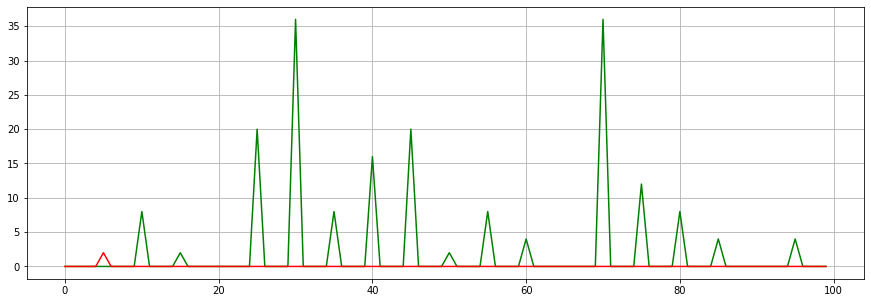

In [ ]:
G =[]
B =[]

for j in range (100):
  g = [Pre_shock2[i] for i in range(194) if Pre_shock2[i]['% Charge'].iloc[0]==j and Pre_shock2[i]['Qualité EEG'].iloc[0]=='+']
  g1 = [Pre_shock2[i] for i in range(194) if Pre_shock2[i]['% Charge'].iloc[0]==j and Pre_shock2[i]['Qualité EEG'].iloc[0]=='++']
  g2 = [Pre_shock2[i] for i in range(194) if Pre_shock2[i]['% Charge'].iloc[0]==j and Pre_shock2[i]['Qualité EEG'].iloc[0]=='+++']

  b = [Pre_shock2[i] for i in range(194) if Pre_shock2[i]['% Charge'].iloc[0]==j and Pre_shock2[i]['Qualité EEG'].iloc[0]=='-']
  G.append(len(g)+len(g1)+len(g2))
  B.append(len(b))
plt.figure(figsize=(15,5))
plt.plot(G, color ='G')
plt.plot(B, color ='R')  
plt.grid()
plt.show()

In [ ]:
Pre_post_shock2 = pd.concat(Pre_shock2, axis=0)

In [ ]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

EEGs Concatenation

In [ ]:
Concat_quad0= pd.concat([EEGs_Quad_Channel[i] for i in range(200)], axis=0)[['EEG0','EEG1','EEG2','EEG3','% Charge','Qualité clinique']]
pd.to_pickle(Concat_quad0, 'Concat_quad0.pkl')
del Concat_quad0

In [ ]:
Concat_quad1= pd.concat([EEGs_Quad_Channel[i] for i in range(200,403)], axis=0)[['EEG0','EEG1','EEG2','EEG3','% Charge','Qualité clinique']]
pd.to_pickle(Concat_quad1, 'Concat_quad1.pkl')
del Concat_quad1

In [ ]:
Concat_quad= pd.concat([pd.read_pickle('Concat_quad0.pkl'), pd.read_pickle('Concat_quad1.pkl')], axis=0)

In [ ]:
pd.to_pickle(Concat_quad, 'Concat_quad.pkl')

In [ ]:
!cp Concat_quad.pkl /content/gdrive/MyDrive/Sajjad_cloned_ready/Concat_quad.pkl

In [ ]:
Concat_quad_pkl = pd.read_pickle('Concat_quad.pkl')

Scaling

In [ ]:
# In the charge column some of the rows' value is: '5 puis 10' which is not a float so we repalced it by the 10.
Concat_quad_pkl = Concat_quad_pkl.replace('5 puis 10',10)

In [ ]:
scale = MinMaxScaler()
Concat_quad_pkl[['EEG0','EEG1','EEG2','EEG3','% Charge']] = scale.fit_transform(Concat_quad_pkl[['EEG0','EEG1','EEG2','EEG3','% Charge']])

In [ ]:
Concat_quad_pkl

In [ ]:
#Saving data to gdrive
pd.to_pickle(Concat_quad_pkl, 'Concat_quad_pkl_scaled.pkl')
!cp 'Concat_quad_pkl_scaled.pkl' /content/gdrive/MyDrive/Sajjad_cloned_ready/Concat_quad_scaled.pkl

In [ ]:
Concat_quad_pkl = pd.read_pickle('/content/gdrive/MyDrive/Sajjad_cloned_ready/Concat_quad_scaled.pkl')

Label encoding

Dataset and label prepration

In [ ]:
Concat_quad_pkl = Concat_quad_pkl.dropna()

In [ ]:
# Choosing only the good EEGs
Dataset = Concat_quad_pkl[(Concat_quad_pkl['Qualité clinique']== '+++') | (Concat_quad_pkl['Qualité clinique']== '++')][['EEG0','EEG1','EEG2','EEG3','% Charge']]

In [ ]:
# We defined a function to make a dataset with demanded element size

def elementor(df, element_size):
  t0 = df[list(df.columns)[0:-1]].values
  round = int(t0.shape[0]/element_size)
  t0 = t0[0:(round*element_size)]
  return t0.reshape((round, element_size, df.shape[1]-1)), np.array([df[list(df.columns)[-1]].iloc[i*element_size:(i+1)*element_size].mean()  for i in range(round)])

data, label = elementor(Dataset,196)

In [ ]:
print('data shape: ',data.shape,'\t' ,'label shape: ',label.shape )

In [ ]:
print(np.any(np.isnan(data)))

#NN


In [ ]:
data = data.reshape((49473, 28,28,1))

In [ ]:
f = lambda x: int(x*10)
F = np.vectorize(f)
F(label)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(F(label))
y[5000]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, label,train_size = 0.33)

In [ ]:
print(np.any(np.isnan(x_train)))

In [ ]:
Y = keras.utils.to_categorical(Y, 11)

In [ ]:

x_train = x_train.astype("float32")
x_test = x_test.astype("float32") 


y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

In [ ]:

data = data.astype("float32")

Flabel = keras.utils.to_categorical(F(label), 11)

In [ ]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        layers.Conv2D(32, kernel_size=(3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu"),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu"),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.BatchNormalization(),
        layers.Flatten(),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.Dropout(0.5),
        layers.Dense(1, activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),),
        layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
        # layers.BatchNormalization(),
    ]
)

model.summary()

In [ ]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(11, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 10
sgd = optimizers.SGD(lr=0.01, clipnorm=0.1)
model.compile(loss="categorical_crossentropy", optimizer= 'adam')

model.fit(data, Flabel, batch_size=batch_size, epochs=epochs)

In [ ]:
pred = model.predict(data)

In [ ]:

np.argmax(pred[30251])

In [ ]:
Flabel[-1]

In [ ]:
X = np.random.random((20000,28,28,1))
Y = X/2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

#Test

In [ ]:
pip install -U tensorflow-addons

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

In [ ]:
weight_decay = 0.0001
batch_size = 128
num_epochs = 50
dropout_rate = 0.2
image_size = 64  # We'll resize input images to this size.
patch_size = 8  # Size of the patches to be extracted from the input images.
num_patches = (image_size // patch_size) ** 2  # Size of the data array.
embedding_dim = 256  # Number of hidden units.
num_blocks = 4  # Number of blocks.

print(f"Image size: {image_size} X {image_size} = {image_size ** 2}")
print(f"Patch size: {patch_size} X {patch_size} = {patch_size ** 2} ")
print(f"Patches per image: {num_patches}")
print(f"Elements per patch (3 channels): {(patch_size ** 2) * 3}")

#Signal preprosessing

In [ ]:
Concat_quad_pkl.head(3)

In [ ]:
Concat_quad_pkl = Concat_quad_pkl.replace('5 puis 10',10)

In [ ]:
Positive = Concat_quad_pkl[Concat_quad_pkl['Qualité clinique']=='+++']
Negative = Concat_quad_pkl[Concat_quad_pkl['Qualité clinique']=='-']

<h3> Comparison of bad and good EEG avarage amplitude to charge (millivolt).<p>
<font color=Green> My investigation shows that in the bad ECT experiments the parctioner used lower charge</p>

In [ ]:
"""(Negative['EEG0'].astype(float)/Negative['% Charge'].astype(float)).mean()
(Positive['EEG0'].astype(float)/Positive['% Charge'].astype(float)).mean()"""
i = 0
print('EEG{} nagative ratio: '.format(i), (Negative['EEG{}'.format(i)].astype(float)/Negative['% Charge'].astype(float)).mean(),'\n', 'EEG{} positive ratio:'.format(i),
      (Positive['EEG{}'.format(i)].astype(float)/Positive['% Charge'].astype(float)).mean())

In [ ]:
"""(Negative['EEG1'].astype(float)/Negative['% Charge'].astype(float)).mean()
(Positive['EEG1'].astype(float)/Positive['% Charge'].astype(float)).mean()"""
i = 1
print('EEG{} nagative ratio: '.format(i), (Negative['EEG{}'.format(i)].astype(float)/Negative['% Charge'].astype(float)).mean(),'\n', 'EEG{} positive ratio:'.format(i),
      (Positive['EEG{}'.format(i)].astype(float)/Positive['% Charge'].astype(float)).mean())

In [ ]:
"""(Negative['EEG2'].astype(float)/Negative['% Charge'].astype(float)).mean()
(Positive['EEG2'].astype(float)/Positive['% Charge'].astype(float)).mean()"""
i = 2
print('EEG{} nagative ratio: '.format(i), (Negative['EEG{}'.format(i)].astype(float)/Negative['% Charge'].astype(float)).mean(),'\n', 'EEG{} positive ratio:'.format(i),
      (Positive['EEG{}'.format(i)].astype(float)/Positive['% Charge'].astype(float)).mean())

In [ ]:
"""(Negative['EEG3'].astype(float)/Negative['% Charge'].astype(float)).mean()
(Positive['EEG3'].astype(float)/Positive['% Charge'].astype(float)).mean()"""
i = 3
print('EEG{} nagative ratio: '.format(i), (Negative['EEG{}'.format(i)].astype(float)/Negative['% Charge'].astype(float)).mean(),'\n', 'EEG{} positive ratio:'.format(i),
      (Positive['EEG{}'.format(i)].astype(float)/Positive['% Charge'].astype(float)).mean())

In [ ]:
Good_50 = Concat_quad_pkl[(Concat_quad_pkl['% Charge']==50) & (Concat_quad_pkl['Qualité clinique']=='+++')]
Bad_50 = Concat_quad_pkl[(Concat_quad_pkl['% Charge']==50) & (Concat_quad_pkl['Qualité clinique']=='-')]

In [ ]:
Good_50['EEG0'].mean()

#TEST

In [ ]:
import scipy 


In [ ]:
x= np.linspace(0,20000,10000)

In [ ]:
from scipy.fft import fft

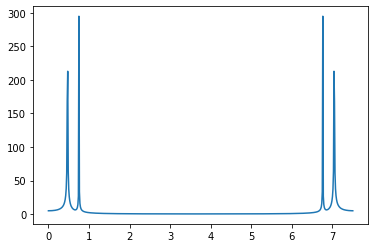

In [ ]:
plt.plot(10*x,np.abs(np.fft.fft(np.sin(50.0 * 2.0*np.pi*x) + np.sin(80.0 * 2.0*np.pi*x))))

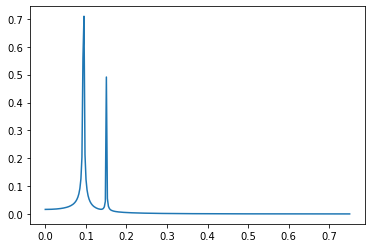

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [ ]:
EEGs_Quad_Channel[0]

,EEG0,EEG1,EEG2,EEG3,Date,Ti vs Tt,Site,Phase,% Charge,Durée clinique,Durée EEG,Anesthésiant,Qualité clinique,Qualité EEG,Adranergie,Qualité Aplatissement,Patient_id,Xls_file_path,EEG_file_path
0,13.3,18.6,-0.1,10.4,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
1,14.9,21.5,2.4,12.8,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
2,15.0,22.8,4.3,14.4,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
3,13.5,22.4,5.1,14.9,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
4,10.5,20.6,4.4,14.5,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40841,-30.1,-17.6,-9.0,10.3,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40842,-29.3,-17.5,-8.8,10.1,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40843,-28.3,-17.1,-8.4,9.3,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
40844,-27.1,-16.4,-7.8,7.8,01-09-2021,Tt,BiT,Entretien,50.0,40.0,70.0,Metho,+++,+++,+,+++,135866,/content/gdrive/My Drive/Sajjad_cloned_ready/1...,/content/gdrive/My Drive/Sajjad_cloned_ready/1...
